**Задача: Численное интегрирование. Светимость черного тела**

Выполнила: Яшина Дарья 3823М1ФИии1

В ходе данной лабораторной работы необходимо:

    1) Постройте для Солнца график зависимости φ(λ,T) от λ;
    
    2) С помощью численного интегрирования найдите светимость Солнца на видимой области длин волн, т.,е. для λ в диапазоне    от λ_1 до λ_2;
    
    3) Найдите также светимость Солнца для всех длин волн: от 0 до ∞ ( через несобственный интеграл );
    
    4) Этот интеграл, оказывается, можно взять аналитически и энергетическая светимость равна R∗=σT^4. Это так называемый   закон Стефана–Больцмана. Константа σ - называется константой Стефана–Больцмана. Сравните полученный результат с результатом из предыдущего пункта;
    
    5) Найдите так называемую солнечную постоянную – мощность солнечного излучения, падающего перпендикулярно на единичную   площадку на высоте верхней границы атмосферы Земли ( с помощью расстояния от Солнца до Земли );
    
    6) Попробуйте найти вычисленные вами величины в литературе и сравните ваши значения с найденными;
    
    7) Сделайте выводы;


In [1]:
#Подключим необходимые библиотеки
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
import seaborn as sns

- Задание 1:


In [2]:
# Перед тем как строить график, необходимо посчитать φ(λ,T) по формуле
# необходимые константы
h = 6.6261*10**-34
k = 1.3806*10**-23
c = 2.9979*10**8
T = 5778

lyambda_1 = 1*10**-7
lyambda_2 = 30*10**-7
points = 200

# посчитаем  спектральную плотность по формуле на заданном диапазоне
lyambda = np.linspace(lyambda_1,lyambda_2, points)
pfi = (2*np.pi*h*(c**2))/((lyambda**5)*(np.e**( (h*c)/(lyambda*k*T)) - 1))


In [3]:
#вынесем нашу формулу в отдельную функцию, так как она понадобится нам много раз:
def func(lyambda):
    pfi = (2*np.pi*h*(c**2))/((lyambda**5)*(np.e**( (h*c)/(lyambda*k*T)) - 1))
    return pfi

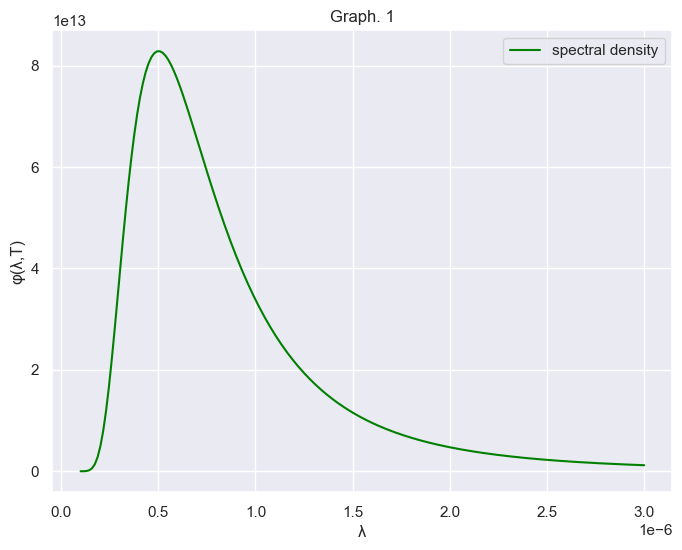

In [4]:
plt.figure(figsize=(8, 6))
sns.set(style='darkgrid')

plt.plot(lyambda, pfi, label='spectral density', color='green')
plt.xlabel('λ')
plt.ylabel('φ(λ,T)')
plt.title('Graph. 1')
plt.legend()

- Задание 2:

Для определения энергии, излучаемой телом в определенном диапазоне частот &lambda;₁, &lambda;₂
необходио найти интеграл:



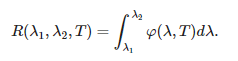

Воспользуемся формулой Симпсона:

Формула Симпсона (также Ньютона-Симпсона) относится к приёмам численного интегрирования. Получила название в честь британского математика Томаса Симпсона (1710—1761).

Суть метода заключается в приближении подынтегральной функции на отрезке [a,b] интерполяционным многочленом второй степени p₂(x), то есть приближение графика функции на отрезке параболой.

In [5]:
lyambda_1 = 3.5 * (10**(-7))
lyambda_2 = 7 * (10**(-7))
N = 100
H = (lyambda_2 - lyambda_1)/N

lyambda = np.arange(lyambda_1 + H/2, lyambda_2, H)

R = integrate.simps(func(lyambda), lyambda)
print("Таким образом, энергия, излучаемая телом в определенном диапазоне частот λ₁, λ₂ равна ", R)

Таким образом, энергия, излучаемая телом в определенном диапазоне частот λ₁, λ₂ равна  26239611.853874616


- Задание 3:
Для того, чтобы найти светимость Солнца для всех длин волн: от 0 до ∞  можно воспользоваться формулой:

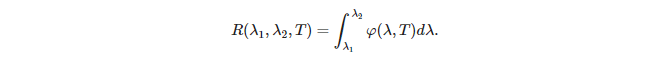

Однако, также нужно будет умножить полученный результат на площадь поверхности Солнца, которая рассчитывается по формуле $4 \pi R^2$


In [6]:
R_sun = 6.957 * 10**8
integr, error = integrate.quad(func, 0, np.inf)
result_luminosity = 4*np.pi*integr*(R_sun**2)
print("Таким образом, светимость Солнца для всех длин волн: от 0 до ∞ равна ", result_luminosity)

Таким образом, светимость Солнца для всех длин волн: от 0 до ∞ равна  3.827881358837831e+26


C:\Users\stale\AppData\Local\Temp\ipykernel_3248\847976597.py:2: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  integr, error = integrate.quad(func, 0, np.inf)


- Задание 4: 

Необходимо взять интеграл аналитически ( используя закон Стефана-Больцмана):

In [7]:
#добавим необходимые константы
sb_const = (2*(np.pi**5)*(k**4))/(15*(c**2)*(h**3))
R_sun = 6.957*(10**8)

R_an = sb_const*(T**4)
result_luminosity_an = 4*np.pi*R_an*(R_sun**2)
print("Таким образом, светимость Солнца для всех длин волн: от 0 до ∞ посчитанная с помощью  закона Стефана–Больцмана равна\n", 
      result_luminosity_an)

Таким образом, светимость Солнца для всех длин волн: от 0 до ∞ посчитанная с помощью  закона Стефана–Больцмана равна
 3.843397958410175e+26


In [8]:
#Посчитаем разницу:
difference = result_luminosity_an - result_luminosity
print("Разница между подсчетами составляет приблизительно ", difference)

Разница между подсчетами составляет приблизительно  1.5516599572343778e+24


- Задание 5:

Необходимо найти солнечную постоянную. Для этого воспользуемся соответствующей формулой:



In [12]:
def sun_const(result_luminosity, R_sun_earth):
    result = result_luminosity/(4*np.pi*(R_sun_earth**2))
    return result

In [15]:
S_sun_earth = 149.6 * 10**9
#вычисляем с использованием светимости солнца (Стефан - Больцман)
sun_constant_1 = sun_const(result_luminosity_an, S_sun_earth)
print("Таким образом, солнечная постоянна равна  ", sun_constant_1)

Таким образом, солнечная постоянна равна   1366.6027931665326


In [16]:
S_sun_earth = 149.6 * 10**9
#вычисляем с использованием светимости солнца (несобственный интеграл)
sun_constant_2 = sun_const(result_luminosity, S_sun_earth)
print("Таким образом, солнечная постоянна равна  ", sun_constant_2)

Таким образом, солнечная постоянна равна   1361.085532517109


- Задание 6:

Сравним полученные результаты  со значениями из литературы:

- **Результаты, полученные в ходе лабораторной работы**:
    
    1. Cветимость Солнца на видимой области длин волн: $26239611.853874616$ $Вт$     
    
    2. Cветимость Солнца для всех длин волн: $3.8278*10^{26}$  $Вт$
    
    3. Cветимость Солнца, вычисленная с помощью несобственного интеграла: $3.8278*10^{26}$  $Вт$
    
    4. Cветимость Солнца, вычисленная с помощью закона Стефана - Больцмана: $3.8433*10^{26}$  $Вт$
    
    5. Солнечная постоянная ( светимость рассчитанная с помощью закона Стефана - Больцмана): $1366.6027931665326$  $Вт/м^{2}$
    
    6. Солнечная постоянная ( светимость рассчитанная с помощью несобственного интеграла ): $1361.085532517109$  $Вт/м^{2}$ 
    
    
- **Значения из литературы**:

    1. Cветимость Солнца: $3.846*10^{26}$ $Вт$ 
    
    2. Солнечная постоянна: $1360.8$ $Вт/м^{2}$ 

- Задание 7:

Необходимо сделать некоторые выводы из полученных результатов.

- Учитывая некоторую погрешность, которая возникает при вычислениях, результаты полученные в ходе лабораторной работы почти идентичны значениям из литературных источников. 

- Также хотелось бы отметить, что наиболее точный результат значения светимости Солнца был получен при вычислении аналитическим способом, т.е. с помощью закона Стефана - Больцмана. 

- Солнечная постоянная была посчитанна с различными значениями светимости Солнца. В результате сравнения с литературой, можно сделать вывод, что при использовании светимости рассчитанной с помощью несобственного интеграла, полученное значение солнечной постоянной наиболее точное.